In [2]:
from sympy import *

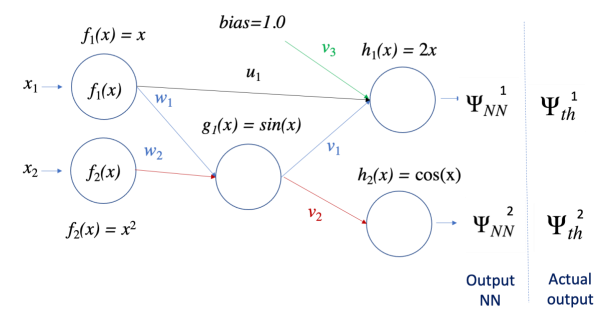
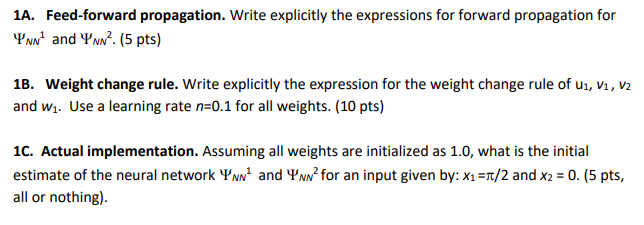

**Actual quiz**
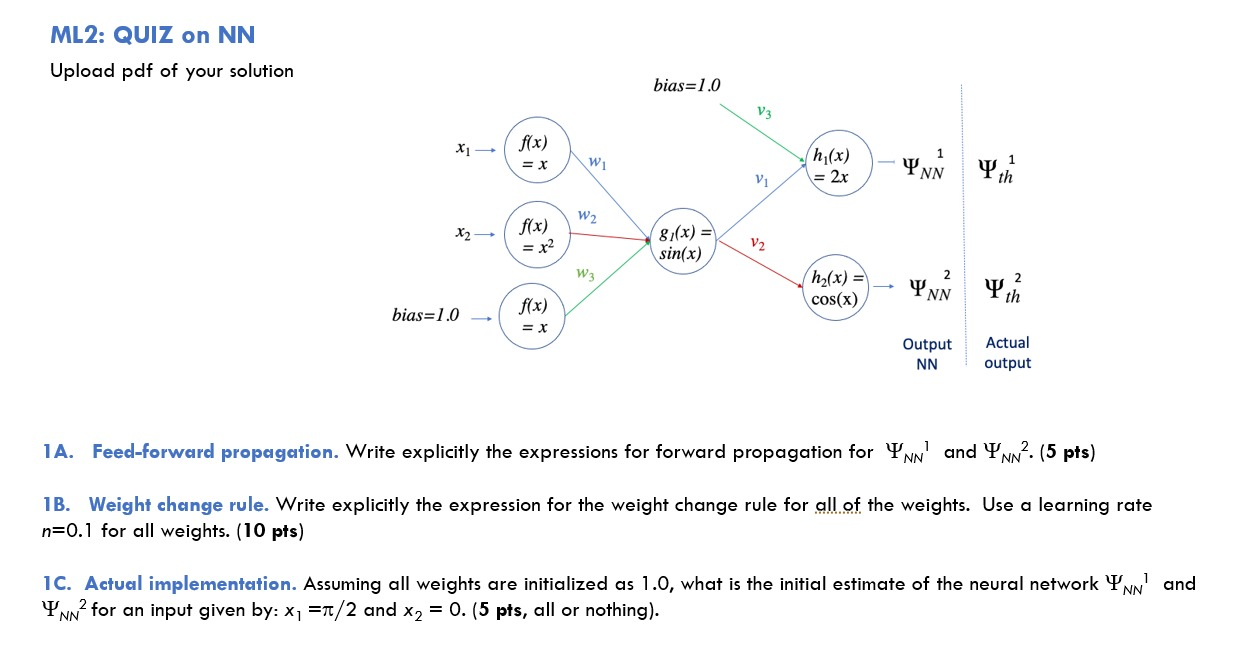

In [51]:
x1 = symbols('x_1')
x2 = symbols('x_2')

w1 = symbols('w_1')
w2 = symbols('w_2')
w3 = symbols('w_3')

# u1 = symbols('u_1')

v1 = symbols('v_1')
v2 = symbols('v_2')
v3 = symbols('v_3')

Y_ACT1 = symbols('Psi_act1')
Y_ACT2 = symbols('Psi_act2')

gamma = 0.1

f1 = x1
f2 = x2**2
f3 = 1


g1 = sin(f1*w1 + f2*w2 + f3*w3)

h1 = 2*(v1*g1 + v3*1)
h2 = cos(v2*g1)

Y_NN1 = h1
Y_NN2 = h2

E = 0.5*(Y_NN1 - Y_ACT1)**2 + 0.5*(Y_NN2 - Y_ACT2)**2
E

0.5*(-Psi_act2 + cos(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3)))**2 + 0.5*(-Psi_act1 + 2*v_1*sin(w_1*x_1 + w_2*x_2**2 + w_3) + 2*v_3)**2

# 1A Forward Prop Eqs

`PSI_NN1`

In [52]:
Y_NN1

2*v_1*sin(w_1*x_1 + w_2*x_2**2 + w_3) + 2*v_3

`PSI_NN2`

In [53]:
Y_NN2

cos(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3))

# 1B weight change rule

`u1`

In [34]:
# dE_u1 = diff(E, u1)
# u1_update = u1 - gamma*dE_u1
# u1_update

u_1 - 0.2*x_1*(-Psi_act1 + 2*u_1*x_1 + 2*v_1*sin(w_1*x_1 + w_2*x_2**2) + 2*v_3)

`v1`

In [67]:
dE_v1 = diff(E, v1)
v1_update = v1 - gamma*dE_v1
dE_v1

2.0*(-Psi_act1 + 2*v_1*sin(w_1*x_1 + w_2*x_2**2 + w_3) + 2*v_3)*sin(w_1*x_1 + w_2*x_2**2 + w_3)

`v2`

In [68]:
dE_v2 = diff(E, v2)

v2_update = v2 - gamma*dE_v2
v2_update
dE_v2

-1.0*(-Psi_act2 + cos(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3)))*sin(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3))*sin(w_1*x_1 + w_2*x_2**2 + w_3)

`v3`

In [69]:
dE_v3 = diff(E, v3)

v3_update = v3 - gamma*dE_v3
v3_update
dE_v3

-2.0*Psi_act1 + 4.0*v_1*sin(w_1*x_1 + w_2*x_2**2 + w_3) + 4.0*v_3

`w1`

In [65]:
dE_w1 = diff(E, w1)
w1_update = w1 - gamma*dE_w1
w1_update
dE_w1

2.0*v_1*x_1*(-Psi_act1 + 2*v_1*sin(w_1*x_1 + w_2*x_2**2 + w_3) + 2*v_3)*cos(w_1*x_1 + w_2*x_2**2 + w_3) - 1.0*v_2*x_1*(-Psi_act2 + cos(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3)))*sin(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3))*cos(w_1*x_1 + w_2*x_2**2 + w_3)

`w2`

In [64]:
dE_w2 = diff(E, w2)
w2_update = w2 - gamma*dE_w2
w2_update
dE_w2

2.0*v_1*x_2**2*(-Psi_act1 + 2*v_1*sin(w_1*x_1 + w_2*x_2**2 + w_3) + 2*v_3)*cos(w_1*x_1 + w_2*x_2**2 + w_3) - 1.0*v_2*x_2**2*(-Psi_act2 + cos(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3)))*sin(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3))*cos(w_1*x_1 + w_2*x_2**2 + w_3)

`w3`

In [66]:
dE_w3 = diff(E, w3)
w3_update = w3 - gamma*dE_w3
w3_update
dE_w3

2.0*v_1*(-Psi_act1 + 2*v_1*sin(w_1*x_1 + w_2*x_2**2 + w_3) + 2*v_3)*cos(w_1*x_1 + w_2*x_2**2 + w_3) - 1.0*v_2*(-Psi_act2 + cos(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3)))*sin(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3))*cos(w_1*x_1 + w_2*x_2**2 + w_3)

# 1C Implementation
- all weights = 1
- x_1 = pi/2
- x_2 = 0

## solving for Y_NN1

In [61]:
import numpy as np
display(Y_NN1)
lambdify((x1,x2,v1,w1,w2,w3,v3), Y_NN1)(np.pi/2,0,1,1,1,1,1)

2*v_1*sin(w_1*x_1 + w_2*x_2**2 + w_3) + 2*v_3

3.0806046117362795

## Solving for Y_NN2

In [63]:
display(Y_NN2)

lambdify((x1,x2,v2,w1,w2,w3), Y_NN2)(np.pi/2,0,1,1,1,1)

cos(v_2*sin(w_1*x_1 + w_2*x_2**2 + w_3))

0.8575532158463933

In [70]:
diff?

Signature: diff(f, *symbols, **kwargs)
Docstring:
Differentiate f with respect to symbols.

Explanation

This is just a wrapper to unify .diff() and the Derivative class; its
interface is similar to that of integrate().  You can use the same
shortcuts for multiple variables as with Derivative.  For example,
diff(f(x), x, x, x) and diff(f(x), x, 3) both return the third derivative
of f(x).

You can pass evaluate=False to get an unevaluated Derivative class.  Note
that if there are 0 symbols (such as diff(f(x), x, 0), then the result will
be the function (the zeroth derivative), even if evaluate=False.

Examples

>>> from sympy import sin, cos, Function, diff
>>> from sympy.abc import x, y
>>> f = Function('f')

>>> diff(sin(x), x)
cos(x)
>>> diff(f(x), x, x, x)
Derivative(f(x), (x, 3))
>>> diff(f(x), x, 3)
Derivative(f(x), (x, 3))
>>> diff(sin(x)*cos(y), x, 2, y, 2)
sin(x)*cos(y)

>>> type(diff(sin(x), x))
cos
>>> type(diff(sin(x), x, evaluate=False))
<class 'sympy.core.function.Derivat